### [데이터기반시각화]

- 데이터: 남북한발전전령.xlsx
- 남북한 수력발전전력량에 대한 시각화

-(1) 모듈 로딩하기<hr>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #패키지 리소스(자원) 중 폰트 관련 모음
import matplotlib as mpl

In [89]:
font_path =r'C:\Windows\Fonts\gulim.ttc'
myfont = fm.FontProperties(fname= font_path).get_name()
mpl.rc('font', family = myfont)

(2) 데이터 준비<hr>

In [90]:
file = '../DATA/남북한발전전력량.xlsx'

- 실제 데이터 파일 확인 결과
  * 첫번째 행 컬럼명 데이터
  * 첫번째, 두번째 컬럼을 행 인덱스로 사용
  * 입력값 없는 쉘에 '-'. isnull/isna 사용 불가
    - 삭제 아니라 대체(대체값 0으로)

(3) 데이터 저장: xlsx -> DataFrame

In [91]:
korpowerDF = pd.read_excel(file, index_col= [0,1]) 

(4) 데이터 확인

- 데이터 타입과 실제 데이터 체크
- '-' 데이터를 '0'으로 변경
- object 타입을 uint16으로

In [92]:
korpowerDF.head()

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  

[5 rows x 27 columns]

- 인덱스와 컬럼 속성 확인

In [93]:
print(korpowerDF.index, korpowerDF.columns, sep= '\n\n')

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


(5) 데이터 전처리

5-1. 데이터 자료형 변환 

In [94]:
korpowerDF2 = korpowerDF.replace('-', '0')

In [95]:
#object -> int16
korpowerDF2 = korpowerDF2.astype('int16')
korpowerDF2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int16
 1   1991    9 non-null      int16
 2   1992    9 non-null      int16
 3   1993    9 non-null      int16
 4   1994    9 non-null      int16
 5   1995    9 non-null      int16
 6   1996    9 non-null      int16
 7   1997    9 non-null      int16
 8   1998    9 non-null      int16
 9   1999    9 non-null      int16
 10  2000    9 non-null      int16
 11  2001    9 non-null      int16
 12  2002    9 non-null      int16
 13  2003    9 non-null      int16
 14  2004    9 non-null      int16
 15  2005    9 non-null      int16
 16  2006    9 non-null      int16
 17  2007    9 non-null      int16
 18  2008    9 non-null      int16
 19  2009    9 non-null      int16
 20  2010    9 non-null      int16
 21  2011    9 non-null      int16
 22  2012    9 non-null      int16
 

(6) 데이터 분석 작업

- 남북한의 수력발전량 비교하기

In [96]:
#수력발전량 행 데이터 추출
waterDF = korpowerDF2.xs('수력', level = 1)

In [97]:
x = waterDF.columns
x=list(map(int, x))

<function matplotlib.pyplot.show(close=None, block=None)>

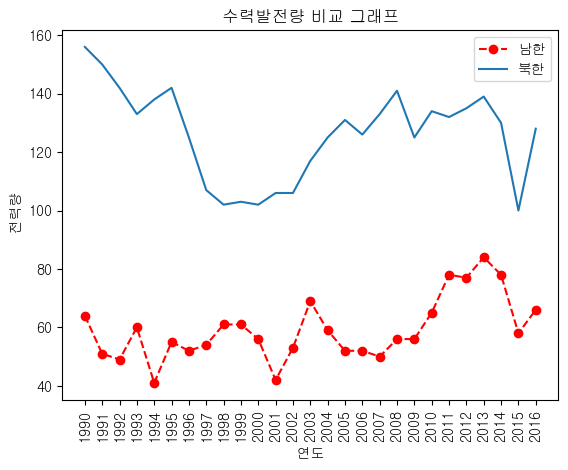

In [98]:
plt.title('수력발전량 비교 그래프')
plt.plot(x, waterDF.loc['남한'],'ro--', label = '남한',)
plt.plot(x, waterDF.loc['북한'], label = '북한')
plt.xticks(x,x, rotation=90)
plt.xlabel(' 연도 ', )
plt.ylabel(' 전력량')
plt.legend()
plt.show

#x축 눈금 수치 글자 돌리기: 컬럼 꺼내서? int 형변환? xtick? rotate = 40?

- 남북한의 화력발전량 비교하기

In [99]:
fireDF = korpowerDF2.xs('화력', level = 1)
x = waterDF.columns
x=list(map(int, x))


<function matplotlib.pyplot.show(close=None, block=None)>

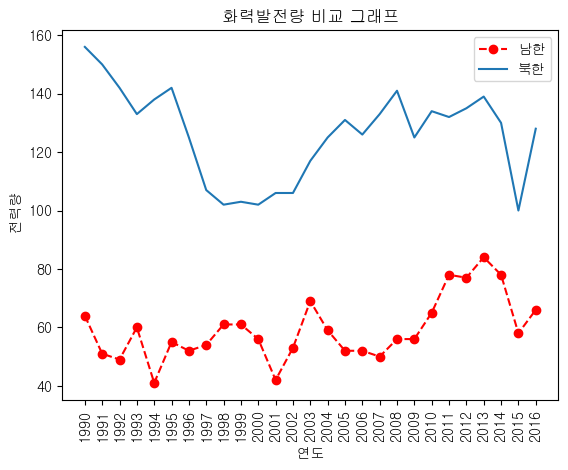

In [100]:
plt.title('화력발전량 비교 그래프')
plt.plot(x, waterDF.loc['남한'],'ro--', label = '남한',)
plt.plot(x, waterDF.loc['북한'], label = '북한')
plt.xticks(x,x, rotation=90)
plt.xlabel(' 연도 ', )
plt.ylabel(' 전력량')
plt.legend()
plt.show

- 남북한의 원자력발전량 비교하기

In [101]:
nuclearDF = korpowerDF2.xs('원자력', level = 1)
x = waterDF.columns
x=list(map(int, x))

<function matplotlib.pyplot.show(close=None, block=None)>

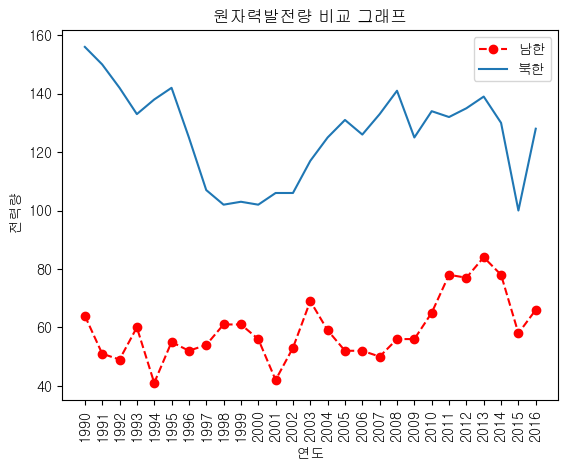

In [103]:
plt.title('원자력발전량 비교 그래프')
plt.plot(x, waterDF.loc['남한'],'ro--', label = '남한',)
plt.plot(x, waterDF.loc['북한'], label = '북한')
plt.xticks(x,x, rotation=90)
plt.xlabel(' 연도 ', )
plt.ylabel(' 전력량')
plt.legend()
plt.show